In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/oad

/content/drive/MyDrive/oad


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam

In [ ]:
img_height, img_width = 224, 224
batch_size = 32
train_dir = '/content/drive/MyDrive/oad/dataset/train/'

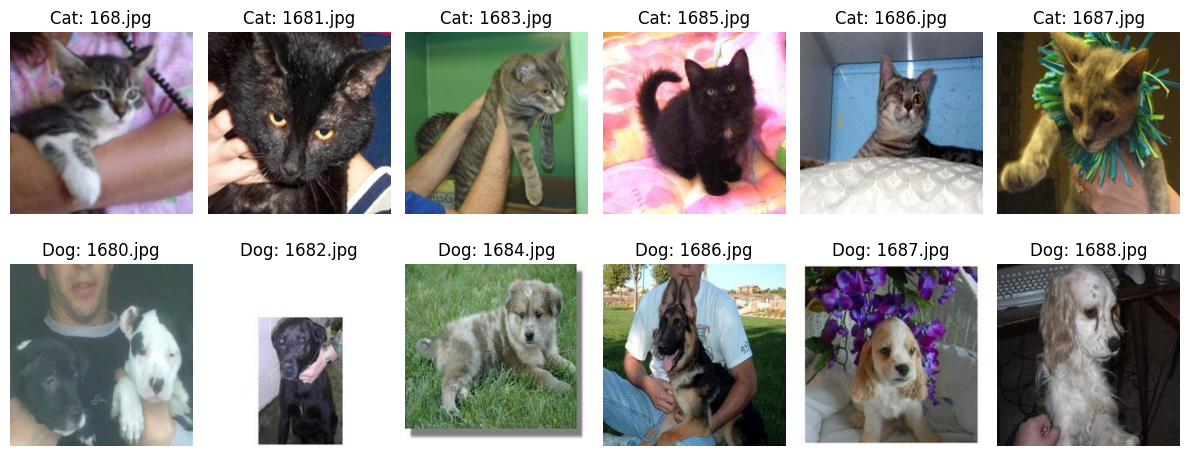

In [ ]:
cat_images = []
dog_images = []

for label in ['0Cat', '1Dog']:
    folder_path = os.path.join(train_dir, label)
    for image_file in os.listdir(folder_path):
        if len(cat_images) < 6 and label == '0Cat':
            img_path = os.path.join(folder_path, image_file)
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img) / 255.0
            cat_images.append((img_array, image_file))
        elif len(dog_images) < 6 and label == '1Dog':
            img_path = os.path.join(folder_path, image_file)
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img) / 255.0
            dog_images.append((img_array, image_file))

plt.figure(figsize=(12, 5))

for i in range(6):
    plt.subplot(2, len(cat_images), i + 1)
    plt.imshow(cat_images[i][0])
    plt.axis('off')
    plt.title(f"Cat: {cat_images[i][1]}")

    plt.subplot(2, len(dog_images), i + 7)
    plt.imshow(dog_images[i][0])
    plt.axis('off')
    plt.title(f"Dog: {dog_images[i][1]}")

plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,            # Поворот изображений на случайный угол
    width_shift_range=0.2,        # Сдвиг по ширине
    height_shift_range=0.2,       # Сдвиг по высоте
    shear_range=0.2,              # Сдвиг изображения
    zoom_range=0.2,               # Увеличение изображения
    horizontal_flip=True,         # Горизонтальное отражение изображений
    fill_mode='nearest',          # Метод заполнения пикселей вне границ
    brightness_range=[0.8, 1.2],  # Диапазон изменения яркости
    channel_shift_range=20.0      # Сдвиг цветовых каналов
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

base_model = EfficientNetB0(include_top=False, weights=None, input_shape=(img_height, img_width, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=60)

Epoch 1/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 690ms/step - accuracy: 0.7776 - loss: 0.4906 - val_accuracy: 0.7219 - val_loss: 0.5323
Epoch 2/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 675ms/step - accuracy: 0.7933 - loss: 0.4517 - val_accuracy: 0.7031 - val_loss: 0.5500
Epoch 3/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 672ms/step - accuracy: 0.7665 - loss: 0.4893 - val_accuracy: 0.7641 - val_loss: 0.4867
Epoch 4/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 685ms/step - accuracy: 0.7799 - loss: 0.4647 - val_accuracy: 0.7797 - val_loss: 0.4919
Epoch 5/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 57s 660ms/step - accuracy: 0.7760 - loss: 0.5013 - val_accuracy: 0.7922 - val_loss: 0.4765
Epoch 6/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 678ms/step - accuracy: 0.7908 - loss: 0.4714 - val_accuracy: 0.8047 - val_loss: 0.5031
Epoch 7/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 675ms/step - accuracy: 0.7933 - loss: 0.4425 - val_accuracy: 0.7203 - val_loss: 0.5871
Epoch 8/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 680ms/step - accuracy: 0.7888 - loss: 0.4653 - val_accu

In [ ]:
model.save('cats_dogs_model.h5')

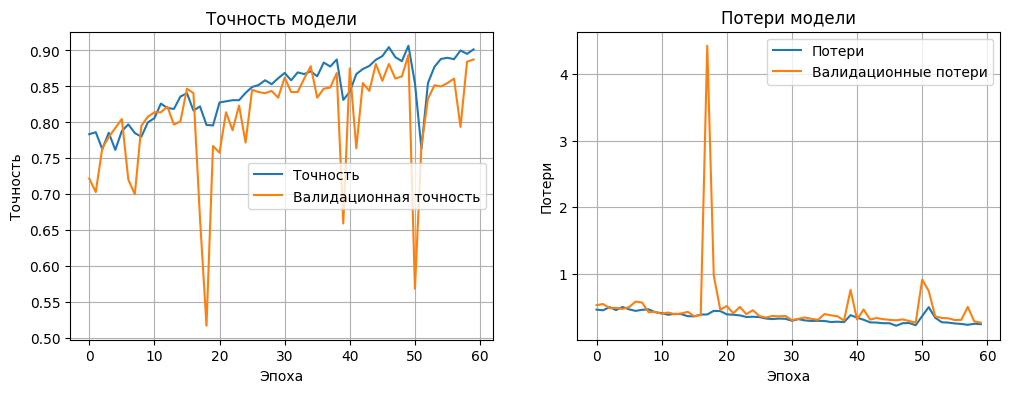

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность')
plt.plot(history.history['val_accuracy'], label='Валидационная точность')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери')
plt.plot(history.history['val_loss'], label='Валидационные потери')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


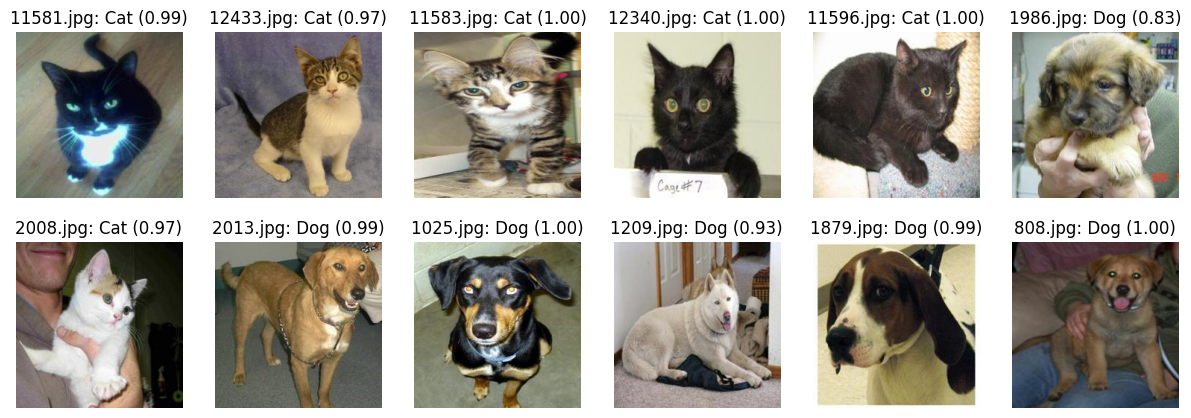

In [ ]:
model = load_model('cats_dogs_model.h5')

img_height, img_width = 224, 224
test_dir = '/content/drive/MyDrive/oad/dataset/test/'

image_files = [f for f in os.listdir(test_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

images = []
predictions = []

for image_file in image_files:
    img_path = os.path.join(test_dir, image_file)
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    images.append(img_array)

images = np.array(images)

predictions = model.predict(images)
predicted_classes = (predictions > 0.5).astype("int32")

def plot_results(image_files, images, predicted_classes):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, len(images) // 2, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

        class_label = 'Cat' if predicted_classes[i] == 0 else 'Dog'
        probability = predictions[i][0] if predicted_classes[i] == 1 else (1 - predictions[i][0])

        plt.title(f"{image_files[i]}: {class_label} ({probability:.2f})")

plot_results(image_files, images, predicted_classes)
plt.show()